Focus on ED for now - simple stuff first!!
Arrival and departure curves from ED
	- Comapre UHS and PHT
	- Weekday vs. weekend

Arrivals/period - overtime

Summary stats of variation for:
Arrival - first clinitian
Triage - …
DTA - admission
 - how vary by time of day/year

Seasonality stats?


In [1]:
#import dep
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

# local import
from hospital import *

In [2]:
hh = hosp('hh')

----------------------------------------
Created hosp class instance:  hh
----------------------------------------
--------------------
Patient fileload: 
--------------------
Found:  hhEDpat.pkl
Missing:  hhIPpat.pkl
--------------------
Daily fileload: 
--------------------
Missing:  hhEDday.pkl
Missing:  hhIPday.pkl


In [3]:
pat = hh.pat.get_ED()

In [4]:
pat.shape

(567635, 36)

In [5]:
pat.head(1)

,hosp_patid,age,gender,site,arrive_datetime,arrive_mode,first_triage_datetime,first_dr_datetime,first_adm_request_time,adm_referral_loc,...,depart_weekday_name,depart_year,depart_date,first_adm_request_datetime,arr_triage_wait,arr_dr_wait,arr_adm_req_wait,adm_req_dep_wait,dr_adm_req_wait,dr_dep_wait
0,489709,43,Female,BNHH,2012-08-01 00:04:00,2.0,2012-08-01 00:18:00,2012-08-01 02:24:00,NaN,NaN,...,Wednesday,2012,2012-08-01,NaT,14.0,140.0,NaN,NaN,NaN,80.0


In [6]:
pat.columns

Index(['hosp_patid', 'age', 'gender', 'site', 'arrive_datetime', 'arrive_mode',
       'first_triage_datetime', 'first_dr_datetime', 'first_adm_request_time',
       'adm_referral_loc', 'adm_flag', 'depart_datetime', 'stream',
       'waiting_time', 'breach_flag', 'arrive_hour', 'arrive_dayofweek',
       'arrive_month', 'arrive_week', 'arrive_weekday_name', 'arrive_year',
       'arrive_date', 'depart_hour', 'depart_dayofweek', 'depart_month',
       'depart_week', 'depart_weekday_name', 'depart_year', 'depart_date',
       'first_adm_request_datetime', 'arr_triage_wait', 'arr_dr_wait',
       'arr_adm_req_wait', 'adm_req_dep_wait', 'dr_adm_req_wait',
       'dr_dep_wait'],
      dtype='object')

# Cleaning

check for long wait times

In [7]:
pat[pat.waiting_time > 7*24*60].shape

(0, 36)

Also some patients that have negative wait times

In [8]:
pat[pat.waiting_time < 0].shape

(10, 36)

pat = pat[pat.waiting_time > 0]

pat.reset_index(drop=True,inplace=True)

### Hourly discharge curves - looks like i need pat level df for medians/IQR calcs + groupby is crazy quick!

input: weekday/weekend, range of dates, 

output: 

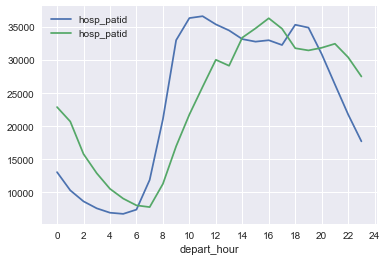

In [9]:
ax = plt.subplot()
arr = pat[['arrive_hour','hosp_patid']].groupby(['arrive_hour']).count()#.plot(ax=ax)
dep = pat[['depart_hour','hosp_patid']].groupby(['depart_hour']).count()#.plot(ax=ax)
arr.plot(ax=ax)
dep.plot(ax=ax)
ax.set_xticks(np.arange(0,25,2));

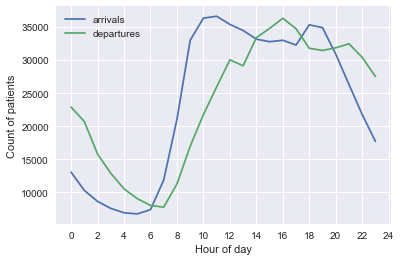

In [10]:
ax = plt.subplot();
arr = pat[['arrive_hour','hosp_patid']].groupby(['arrive_hour']).count()#.plot(ax=ax)
dep = pat[['depart_hour','hosp_patid']].groupby(['depart_hour']).count()#.plot(ax=ax)
arr.plot(ax=ax);
dep.plot(ax=ax);
ax.legend(['arrivals','departures']);
ax.set_xlabel('Hour of day');
ax.set_ylabel('Count of patients');
ax.set_xticks(np.arange(0,25,2));

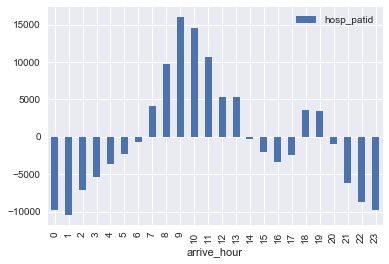

In [11]:
ax1 = plt.subplot();
(arr-dep).plot(kind='bar',ax=ax1);
ax.set_xlabel('Hour of day');
ax.set_ylabel('Change in occupancy');

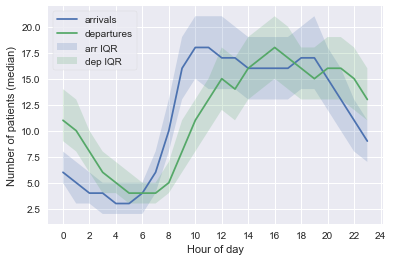

In [12]:
daily_dep = pat[['depart_hour','arrive_date','hosp_patid']].groupby(['depart_hour','arrive_date']).count()
daily_arr = pat[['arrive_hour','arrive_date','hosp_patid']].groupby(['arrive_hour','arrive_date']).count()

daily_dep_m = daily_dep.groupby(['depart_hour']).median()#['hosp_patid'].plot()
daily_arr_m = daily_arr.groupby(['arrive_hour']).median()#['hosp_patid'].plot()

daily_arr_UQ = daily_arr.groupby(['arrive_hour']).quantile(0.75)#['hosp_patid'].plot()
daily_arr_LQ = daily_arr.groupby(['arrive_hour']).quantile(0.25)#['hosp_patid'].plot() 


daily_dep_UQ = daily_dep.groupby(['depart_hour']).quantile(0.75)#['hosp_patid'].plot()
daily_dep_LQ = daily_dep.groupby(['depart_hour']).quantile(0.25)#['hosp_patid'].plot() 


ax = plt.subplot()

daily_arr_m.plot(ax=ax)


ax.fill_between(x = daily_arr_UQ.index,y1=daily_arr_UQ['hosp_patid'],y2=daily_arr_LQ['hosp_patid'],alpha=0.2)

daily_dep_m.plot(ax=ax)
ax.fill_between(x = daily_dep_UQ.index,y1=daily_dep_UQ['hosp_patid'],y2=daily_dep_LQ['hosp_patid'],alpha=0.2)


ax.legend(['arrivals','departures','arr IQR','dep IQR'],frameon=True,loc='upper left');
ax.set_xlabel('Hour of day');
ax.set_ylabel('Number of patients (median)');
ax.set_xticks(np.arange(0,25,2));

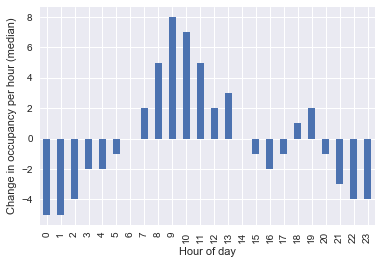

In [13]:
ax = plt.subplot();
(daily_arr_m-daily_dep_m).plot(kind='bar',ax=ax);
ax.set_xlabel('Hour of day');
ax.set_ylabel('Change in occupancy per hour (median)');
ax.legend([])

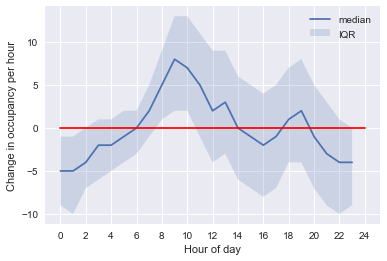

In [14]:
ax = plt.subplot();
(daily_arr_m-daily_dep_m).plot(ax=ax);


y1 = (daily_arr_UQ - daily_dep_LQ)['hosp_patid']
y2 = (daily_arr_LQ - daily_dep_UQ)['hosp_patid']

ax.fill_between(x = daily_dep_UQ.index,y1=y1,y2=y2,alpha=0.2)



ax.set_xlabel('Hour of day');
ax.set_ylabel('Change in occupancy per hour');
ax.legend(['median','IQR'])
ax.plot([0,24],[0,0],'r')
ax.set_xticks(np.arange(0,25,2));

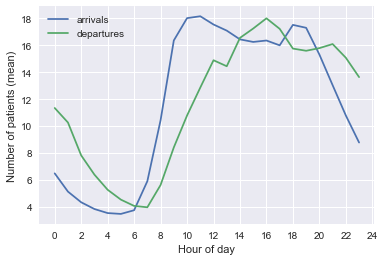

In [15]:
daily_dep = pat[['depart_hour','arrive_date','hosp_patid']].groupby(['depart_hour','arrive_date']).count()
daily_arr = pat[['arrive_hour','arrive_date','hosp_patid']].groupby(['arrive_hour','arrive_date']).count()

daily_arr = daily_arr.groupby(['arrive_hour']).mean()#['hosp_patid'].plot()
daily_dep = daily_dep.groupby(['depart_hour']).mean()#['hosp_patid'].plot()


#UQ = daily.groupby(['depart_hour']).quantile(0.75)#['hosp_patid'].plot()
#LQ = daily.groupby(['depart_hour']).quantile(0.25)#['hosp_patid'].plot() 

ax = plt.subplot()
daily_arr.plot(ax=ax)
daily_dep.plot(ax=ax)

ax.legend(['arrivals','departures']);
ax.set_xlabel('Hour of day');
ax.set_ylabel('Number of patients (mean)');
ax.set_xticks(np.arange(0,25,2));

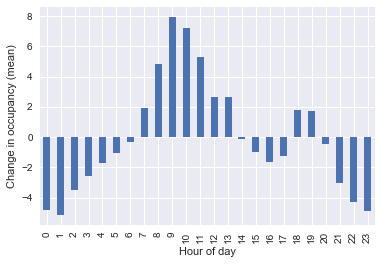

In [16]:
ax = plt.subplot();
(daily_arr-daily_dep).plot(kind='bar',ax=ax);
ax.set_xlabel('Hour of day');
ax.set_ylabel('Change in occupancy (mean)');
ax.legend([])

# Arrival trends over time

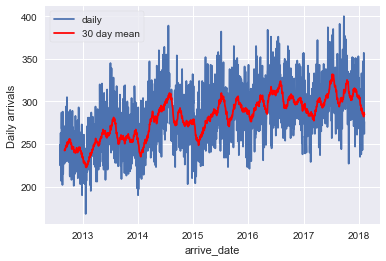

In [17]:
ax = plt.subplot()
pat[['arrive_date','hosp_patid']].groupby('arrive_date').count()[:-1].plot(ax=ax)
pat[['arrive_date','hosp_patid']].groupby('arrive_date').count()[:-1].rolling(30).mean().plot(ax=ax,color='r')
ax.set_ylabel('Daily arrivals')
ax.legend(['daily','30 day mean'],frameon=True)

In [18]:
labels = pat[['arrive_year','arrive_month','hosp_patid']].groupby(['arrive_year','arrive_month']).count().index

[Text(0,0,'2011'),
 Text(0,0,'2012'),
 Text(0,0,'2013'),
 Text(0,0,'2014'),
 Text(0,0,'2015'),
 Text(0,0,'2016'),
 Text(0,0,'2017'),
 Text(0,0,'2018')]

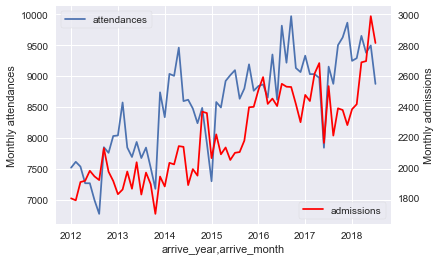

In [19]:
ax = plt.subplot()
pat[['arrive_year','arrive_month','hosp_patid']].groupby(['arrive_year','arrive_month']).count()[:-1].plot(ax=ax,kind='line');
ax2 = ax.twinx()
pat[['arrive_year','arrive_month','adm_flag']].groupby(['arrive_year','arrive_month']).sum()[:-1].plot(ax=ax2,kind='line',style='r');
#pat[['arrive_date','hosp_patid']].groupby('arrive_date').count()[:-1].rolling(30).mean().plot(ax=ax,color='r')
ax.set_ylabel('Monthly attendances');
ax.legend(['attendances'],frameon=True);
ax2.legend(['admissions'],frameon=True, loc='lower right');
ax2.grid(False)
ax2.set_ylabel('Monthly admissions');
ax.set_xticklabels(np.arange(2011,2019,1))### not this is massively guessed!

Text(0.5,0,'')

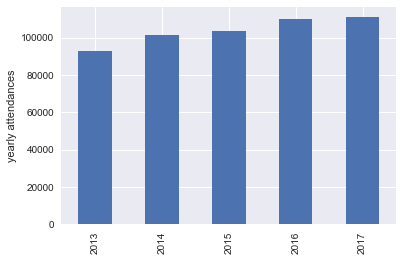

In [20]:
ax = plt.subplot()
pat[['arrive_year','hosp_patid']].groupby('arrive_year').count()[:-1][1:].plot(ax=ax,kind='bar')
#pat[['arrive_date','hosp_patid']].groupby('arrive_date').count()[:-1].rolling(30).mean().plot(ax=ax,color='r')
ax.set_ylabel('yearly attendances')
ax.legend_.remove()
ax.set_xlabel('')
#ax.legend(['daily','30 day mean'],frameon=True)

Text(0,0.5,'Total arrivals')

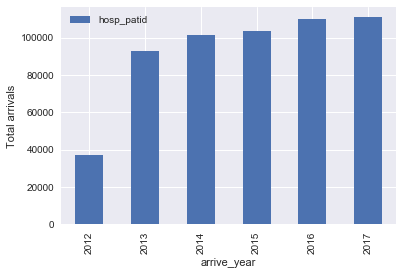

In [21]:
ax = plt.subplot()
pat[['arrive_year','hosp_patid']].groupby('arrive_year').count()[:-1].plot(ax=ax,kind='bar')
#pat[['arrive_date','hosp_patid']].groupby('arrive_date').count()[:-1].rolling(30).mean().plot(ax=ax,color='r')
ax.set_ylabel('Total arrivals')
#ax.legend(['daily','30 day mean'],frameon=True)

Text(0,0.5,'Total arrivals')

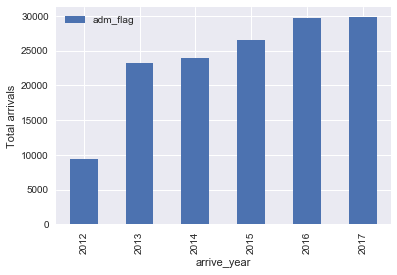

In [22]:
ax = plt.subplot()
pat[['arrive_year','adm_flag']].groupby('arrive_year').sum()[:-1].plot(ax=ax,kind='bar')
#pat[['arrive_date','hosp_patid']].groupby('arrive_date').count()[:-1].rolling(30).mean().plot(ax=ax,color='r')
ax.set_ylabel('Total arrivals')
#ax.legend(['daily','30 day mean'],frameon=True)

In [23]:
pat[['arrive_year','hosp_patid']].groupby('arrive_year').count()[1:-1]

,hosp_patid
arrive_year,
2013,93024
2014,101688
2015,103547
2016,110075
2017,110887


In [24]:
yearly = pat.groupby('arrive_year').agg({'hosp_patid':'count','adm_flag':'sum'})[1:-1]

In [25]:
yearly.rename(columns={'adm_flag':'ED admissions','hosp_patid':'ED attendances'},inplace=True)

In [26]:
yearly['conversion ratio'] = 100* yearly['ED admissions'] / yearly['ED attendances']

In [27]:
yearly

,ED attendances,ED admissions,conversion ratio
arrive_year,,,
2013,93024,23189,24.927976
2014,101688,23898,23.501298
2015,103547,26563,25.653085
2016,110075,29702,26.983420
2017,110887,29798,26.872402


In [28]:
(101688 - 93024)/93024

0.09313725490196079

In [29]:
yearly.pct_change()*100

,ED attendances,ED admissions,conversion ratio
arrive_year,,,
2013,NaN,NaN,NaN
2014,9.313725,3.057484,-5.723198
2015,1.828141,11.151561,9.156035
2016,6.304384,11.817189,5.185869
2017,0.737679,0.323211,-0.411433


In [30]:
yearly.loc[[2013,2017]].pct_change()*100

,ED attendances,ED admissions,conversion ratio
arrive_year,,,
2013,NaN,NaN,NaN
2017,19.202571,28.500582,7.800176


In [31]:
yearly.loc[[2013,2017]].pct_change()*100/4

,ED attendances,ED admissions,conversion ratio
arrive_year,,,
2013,NaN,NaN,NaN
2017,4.800643,7.125146,1.950044


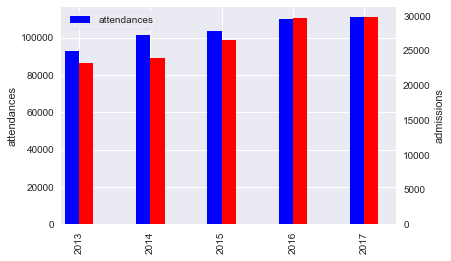

In [32]:
ax = plt.subplot()
ax2 = ax.twinx()
width= 0.2
yearly['ED attendances'].plot.bar(ax=ax,position=1,width=width,color='b')
yearly['ED admissions'].plot.bar(ax=ax2,position=0,width=width,color='r')
ax2.grid(False);
ax.set_ylabel('attendances');
ax2.set_ylabel('admissions');
ax.set_xlabel('')
ax.legend(['attendances','admissions'],frameon=True)


Text(0.5,0,'')

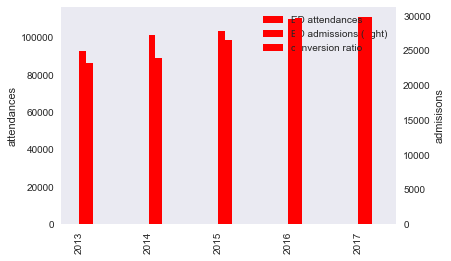

In [33]:
ax = plt.subplot()
#ax2 = ax.twinx()
width= 0.3
#yearly['ED attendances'].plot.bar(ax=ax,position=1,width=width,color='b')
#yearly['ED admissions'].plot.bar(ax=ax,position=0,width=width,secondary_y=True,color='r')
yearly.plot.bar(ax=ax,position=0,width=width,secondary_y=['ED admissions'],color='r')
#ax.grid(False);
ax.set_ylabel('attendances');
ax.right_ax.set_ylabel('admisisons');
#ax2.set_ylabel('admissions');
ax.right_ax.grid(False)
ax.set_xlabel('')
#ax.legend(['attendances','admissions'],frameon=True)


### Summary stats of variation for: Arrival - first clinitian Triage - … DTA - admission

In [34]:
pat.columns

Index(['hosp_patid', 'age', 'gender', 'site', 'arrive_datetime', 'arrive_mode',
       'first_triage_datetime', 'first_dr_datetime', 'first_adm_request_time',
       'adm_referral_loc', 'adm_flag', 'depart_datetime', 'stream',
       'waiting_time', 'breach_flag', 'arrive_hour', 'arrive_dayofweek',
       'arrive_month', 'arrive_week', 'arrive_weekday_name', 'arrive_year',
       'arrive_date', 'depart_hour', 'depart_dayofweek', 'depart_month',
       'depart_week', 'depart_weekday_name', 'depart_year', 'depart_date',
       'first_adm_request_datetime', 'arr_triage_wait', 'arr_dr_wait',
       'arr_adm_req_wait', 'adm_req_dep_wait', 'dr_adm_req_wait',
       'dr_dep_wait'],
      dtype='object')

### waiting time plots

In [35]:
wait_cols = ['arr_triage_wait','arr_dr_wait','dr_adm_req_wait','adm_req_dep_wait','dr_dep_wait']
dt_cols = ['arrive_datetime','first_triage_datetime','first_dr_datetime','first_adm_request_datetime','depart_datetime']

In [36]:
pat[wait_cols].describe()

,arr_triage_wait,arr_dr_wait,dr_adm_req_wait,adm_req_dep_wait,dr_dep_wait
count,563648.000000,567571.000000,118593.000000,118594.000000,567571.000000
mean,12.043955,76.126664,64.332233,130.702723,89.456593
std,512.054942,521.529433,1120.810694,175.462916,529.560274
min,-11520.000000,-10009.000000,-383756.783333,-1435.383333,-383727.000000
25%,2.000000,26.000000,24.116667,44.616667,22.000000
50%,7.000000,59.000000,61.050000,94.200000,58.000000
75%,15.000000,110.000000,107.516667,174.662500,129.000000
max,383767.000000,383906.000000,1704.950000,5318.550000,10072.000000


how many patients have negative adm request to adm times? -20 %!

In [38]:
pat[pat.adm_req_dep_wait < 0].shape

(6111, 36)

In [39]:
118/6

19.666666666666668

Some of these massive wait times are due to errors in dates etc. Lets see how many have crazy wait times... 

In [41]:
exclude_index = pat.query('arr_triage_wait < 0 or arr_dr_wait < 0 or arr_adm_req_wait < 0 or waiting_time < 0'
                          +'or arr_triage_wait > 24*60 or arr_dr_wait > 24*60 or arr_adm_req_wait > 24*60'
                          'or waiting_time > 24*60' + 'or adm_req_dep_wait < 0 or dr_adm_req_wait <0 or dr_dep_wait < 0'
                          ).index


dr_dep_wait < 0 loses about 50% (20k) of these!!!

In [42]:
exclude_index.shape

(43911,)

In [43]:
567/43

13.186046511627907

In [44]:
1440/60

24.0

In [45]:
pat2 = pat.loc[~pat.index.isin(exclude_index)]

In [46]:
pat2[wait_cols].describe()

,arr_triage_wait,arr_dr_wait,dr_adm_req_wait,adm_req_dep_wait,dr_dep_wait
count,520051.000000,523661.000000,95447.000000,95448.000000,523661.000000
mean,11.485235,74.672011,80.446567,135.471532,92.522939
std,16.392266,60.071161,59.534138,142.635745,105.611671
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,27.000000,38.583333,48.095833,25.000000
50%,7.000000,59.000000,69.316667,91.000000,61.000000
75%,15.000000,110.000000,110.300000,161.016667,130.000000
max,1440.000000,935.000000,1234.300000,1370.500000,1423.000000


In [47]:
pat2[pat2.dr_dep_wait < 0].shape

(0, 36)

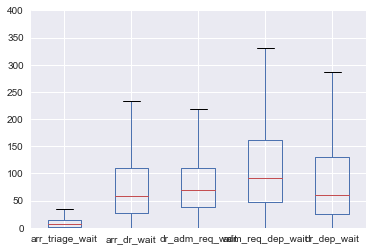

In [48]:
ax = plt.subplot()
pat2[wait_cols].plot.box(ax=ax)
ax.set_ylim(0,400);

C:\Anaconda3\envs\hospital-flow\lib\site-packages\numpy\lib\function_base.py:4274: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\Anaconda3\envs\hospital-flow\lib\site-packages\matplotlib\cbook\__init__.py:1856: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
C:\Anaconda3\envs\hospital-flow\lib\site-packages\matplotlib\cbook\__init__.py:1863: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
C:\Anaconda3\envs\hospital-flow\lib\site-packages\matplotlib\cbook\__init__.py:1871: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
C:\Anaconda3\envs\hospital-flow\lib\site-packages\matplotlib\cbook\__init__.py:1872: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


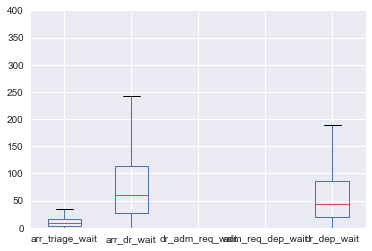

In [49]:
ax = plt.subplot()
pat2[pat2.adm_flag == 0][wait_cols].plot.box(ax=ax)
ax.set_ylim(0,400);

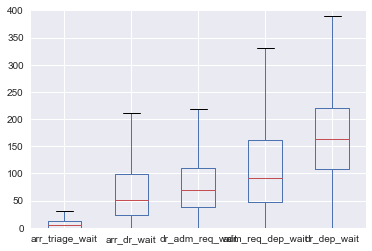

In [50]:
ax = plt.subplot()
pat2[pat2.adm_flag == 1][wait_cols].plot.box(ax=ax)
ax.set_ylim(0,400);

In [51]:
pat2[pat2.adm_flag == 0][wait_cols].describe()

,arr_triage_wait,arr_dr_wait,dr_adm_req_wait,adm_req_dep_wait,dr_dep_wait
count,398072.000000,401501.000000,0.0,0.0,401501.000000
mean,12.214393,76.494721,NaN,NaN,61.387521
std,15.508261,60.540972,NaN,NaN,60.477723
min,0.000000,0.000000,NaN,NaN,0.000000
25%,3.000000,27.000000,NaN,NaN,19.000000
50%,8.000000,61.000000,NaN,NaN,44.000000
75%,16.000000,113.000000,NaN,NaN,87.000000
max,1440.000000,935.000000,NaN,NaN,1382.000000


In [52]:
pat2[pat2.adm_flag == 1][wait_cols].describe()

,arr_triage_wait,arr_dr_wait,dr_adm_req_wait,adm_req_dep_wait,dr_dep_wait
count,121979.000000,122160.000000,95447.000000,95448.000000,122160.000000
mean,9.105666,68.681344,80.446567,135.471532,194.855141
std,18.797381,58.099275,59.534138,142.635745,148.774195
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,24.000000,38.583333,48.095833,108.000000
50%,5.000000,52.000000,69.316667,91.000000,163.000000
75%,12.000000,99.000000,110.300000,161.016667,221.000000
max,1440.000000,658.000000,1234.300000,1370.500000,1423.000000


In [53]:
wait_col2 = ['arr_dr_wait','dr_adm_req_wait','adm_req_dep_wait','dr_dep_wait']

C:\Anaconda3\envs\hospital-flow\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


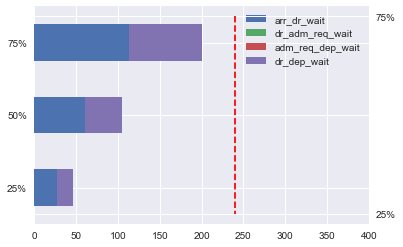

In [54]:
ax = plt.subplot()
pat2[pat2.adm_flag == 0][wait_col2].describe().ix[['25%','50%','75%']].plot.barh(stacked=True,ax=ax);
ax.set_xlim([0,400]);
ax2 = plt.twinx()
ax2.plot([240,240], ['75%','25%'], 'r--');

C:\Anaconda3\envs\hospital-flow\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


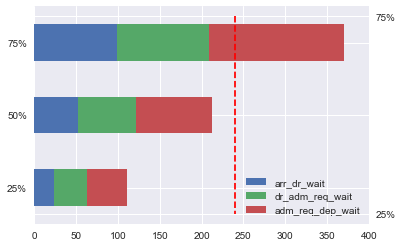

In [55]:
ax = plt.subplot()
pat2[pat2.adm_flag == 1][wait_col2[0:3]].describe().ix[['25%','50%','75%']].plot.barh(stacked=True,ax=ax);

ax.set_xlim([0,400]);
ax2 = plt.twinx()
ax2.plot([240,240], ['75%','25%'], 'r--');

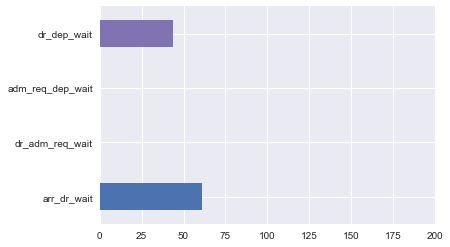

In [56]:
ax = plt.subplot()
pat2[pat2.adm_flag == 0][wait_col2].median().plot.barh(stacked=True);
ax.set_xlim([0,200]);

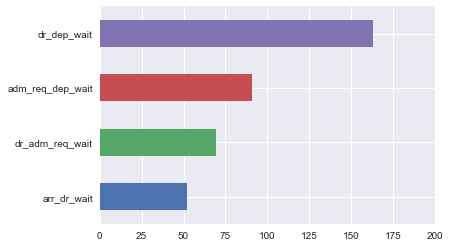

In [57]:
ax = plt.subplot()
pat2[pat2.adm_flag == 1][wait_col2].median().plot.barh(stacked=True);
ax.set_xlim([0,200]);

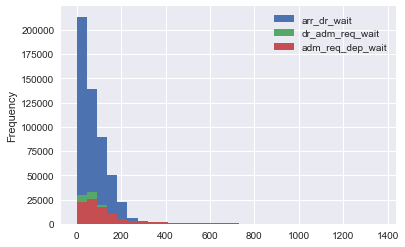

In [58]:
pat2[wait_col2[0:3]].plot.hist(stacked=False,bins=30);

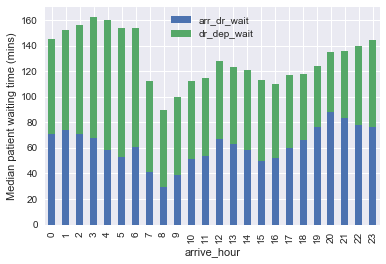

In [60]:
ax = plt.subplot()
pat2.groupby('arrive_hour')[wait_col2[0],wait_col2[3]].median().plot.bar(stacked=True,ax=ax)
ax.set_ylabel('Median patient waiting time (mins)');

(0, 230)

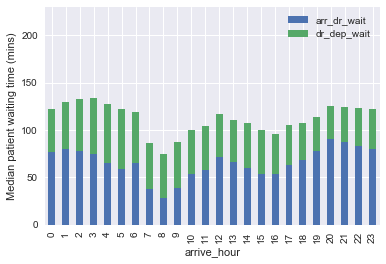

In [61]:
ax = plt.subplot()
pat2[pat2.adm_flag == 0].groupby('arrive_hour')[wait_col2[0],wait_col2[3]].median().plot.bar(stacked=True,ax=ax)
ax.set_ylabel('Median patient waiting time (mins)');
ax.set_ylim([0,230])

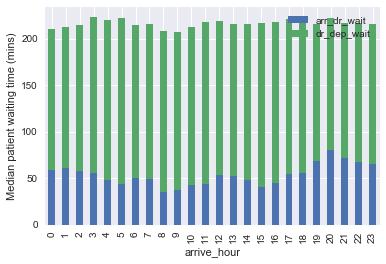

In [62]:
ax = plt.subplot()
pat2[pat2.adm_flag == 1].groupby('arrive_hour')[wait_col2[0],wait_col2[3]].median().plot.bar(stacked=True,ax=ax)
ax.set_ylabel('Median patient waiting time (mins)');

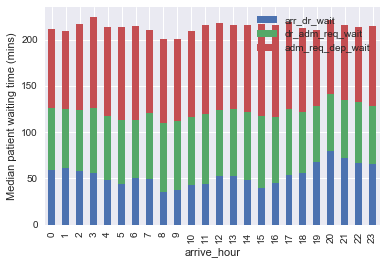

In [63]:
ax = plt.subplot()
pat2[pat2.adm_flag == 1].groupby('arrive_hour')[wait_col2[0:3]].median().plot.bar(stacked=True,ax=ax)
ax.set_ylabel('Median patient waiting time (mins)');

(0, 230)

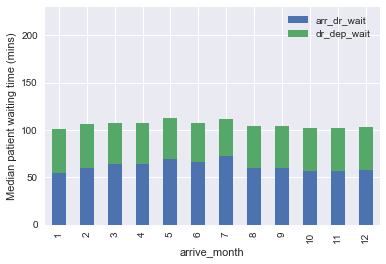

In [64]:
ax = plt.subplot()
pat2[pat2.adm_flag == 0].groupby('arrive_month')[wait_col2[0],wait_col2[3]].median().plot.bar(stacked=True,ax=ax)
ax.set_ylabel('Median patient waiting time (mins)');
ax.set_ylim([0,230])

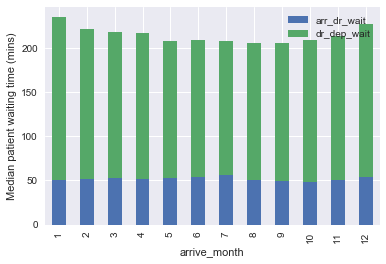

In [65]:
ax = plt.subplot()
pat2[pat2.adm_flag == 1].groupby('arrive_month')[wait_col2[0],wait_col2[3]].median().plot.bar(stacked=True,ax=ax)
ax.set_ylabel('Median patient waiting time (mins)');
#ax.set_ylim([0,230])

auto gerenate year somethere previosu in future!!!!

In [66]:
pat2['arrive_year'] = pat2.arrive_datetime.apply(lambda x : x.year)

C:\Anaconda3\envs\hospital-flow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(0, 240)

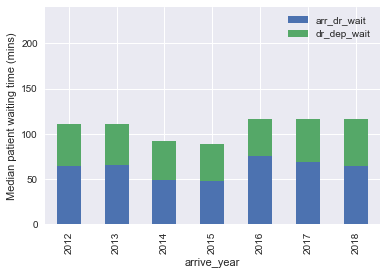

In [67]:
ax = plt.subplot()
pat2[pat2.adm_flag == 0].groupby('arrive_year')[wait_col2[0],wait_col2[3]].median().plot.bar(stacked=True,ax=ax)
ax.set_ylabel('Median patient waiting time (mins)');
ax.set_ylim([0,240])

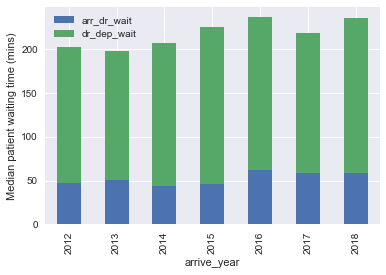

In [68]:
ax = plt.subplot()
pat2[pat2.adm_flag == 1].groupby('arrive_year')[wait_col2[0],wait_col2[3]].median().plot.bar(stacked=True,ax=ax)
ax.set_ylabel('Median patient waiting time (mins)');
#ax.set_ylim([0,230])

In [69]:
pat2[wait_col2].isnull().sum()

arr_dr_wait             63
dr_adm_req_wait     428277
adm_req_dep_wait    428276
dr_dep_wait             63
dtype: int64

In [70]:
pat.adm_flag.value_counts()

0    421589
1    146046
Name: adm_flag, dtype: int64

In [71]:
pat2.adm_flag.value_counts()

0    401561
1    122163
Name: adm_flag, dtype: int64

In [72]:
pat[wait_col2].isnull().sum()

arr_dr_wait             64
dr_adm_req_wait     449042
adm_req_dep_wait    449041
dr_dep_wait             64
dtype: int64

In [73]:
pat[dt_cols].isnull().sum()

arrive_datetime                    0
first_triage_datetime           3987
first_dr_datetime                 64
first_adm_request_datetime    449041
depart_datetime                    0
dtype: int64

### admissions breakdown by time waiting for per speciality

In [74]:
pat2.columns

Index(['hosp_patid', 'age', 'gender', 'site', 'arrive_datetime', 'arrive_mode',
       'first_triage_datetime', 'first_dr_datetime', 'first_adm_request_time',
       'adm_referral_loc', 'adm_flag', 'depart_datetime', 'stream',
       'waiting_time', 'breach_flag', 'arrive_hour', 'arrive_dayofweek',
       'arrive_month', 'arrive_week', 'arrive_weekday_name', 'arrive_year',
       'arrive_date', 'depart_hour', 'depart_dayofweek', 'depart_month',
       'depart_week', 'depart_weekday_name', 'depart_year', 'depart_date',
       'first_adm_request_datetime', 'arr_triage_wait', 'arr_dr_wait',
       'arr_adm_req_wait', 'adm_req_dep_wait', 'dr_adm_req_wait',
       'dr_dep_wait'],
      dtype='object')

In [75]:
pat2.groupby(['adm_referral_loc'])[wait_col2].median().sort_values('adm_req_dep_wait',ascending=False)

,arr_dr_wait,dr_adm_req_wait,adm_req_dep_wait,dr_dep_wait
adm_referral_loc,,,,
TS,96.0,126.833333,221.733333,416.0
IT,19.0,46.800000,126.116667,192.0
PY,66.0,53.958333,119.400000,186.0
FS,21.0,2.100000,117.550000,144.0
GE,26.0,55.616667,113.033333,204.0
NS,27.5,106.308333,108.541667,213.0
MO,47.0,81.866667,108.066667,210.0
ME,48.0,81.200000,104.933333,197.0
OR,49.0,64.883333,98.966667,174.0


#### function to select dates - return df

In [76]:
start_date = pd.datetime(2012,12,31)
end_date =  pd.datetime(2018,12,31)

mask = (pat['arrive_datetime'] > start_date) & (pat['arrive_datetime'] <= end_date)

In [77]:
pat[mask].groupby(['arrive_date']).count().head(1)

,hosp_patid,age,gender,site,arrive_datetime,arrive_mode,first_triage_datetime,first_dr_datetime,first_adm_request_time,adm_referral_loc,...,depart_weekday_name,depart_year,depart_date,first_adm_request_datetime,arr_triage_wait,arr_dr_wait,arr_adm_req_wait,adm_req_dep_wait,dr_adm_req_wait,dr_dep_wait
arrive_date,,,,,,,,,,,,,,,,,,,,,
2012-12-31,223,223,223,223,223,221,221,223,66,65,...,223,223,223,66,221,223,66,66,66,223


# functions to call plotting

In [78]:
def plot(df,include_dow=None,include_dates=None, include_months= None, include_years=None):
    if include_dates != None:
        # call date selection function, retunr df2
    
    if include_dow != None:
        # call day selection function, return df2
        
    #etc 
        
    # do plotting on df2 - groupbys
    # save plots out (how choose filenames)

IndentationError: expected an indented block (<ipython-input-78-4e7be6899862>, line 5)

# dev

In [ ]:
break

In [ ]:
path = './../../3_Data/HH_ED_Flow_Study.csv'

In [ ]:
df = pd.read_csv(path,
        low_memory=False)

In [ ]:
dt_cols = []
for i in df.columns:
    if 'DTTM' in i:
        dt_cols.append(i)

In [ ]:
df[dt_cols]

In [ ]:
df.INITIAL_ASSESSMENT_DTTM[0][0:16]

In [ ]:
df[df.INITIAL_ASSESSMENT_DTTM == '1899-12-30 00:00:00.000000'].INITIAL_ASSESSMENT_DTTM

In [ ]:
df.loc[df.INITIAL_ASSESSMENT_DTTM == '1899-12-30 00:00:00.000000', 'INITIAL_ASSESSMENT_DTTM'] = np.nan

In [ ]:
'1899-12-30 00:00:00.000000'[0:16]

In [ ]:
df['ARRIVAL_DTTM'].dtype

In [ ]:
def convert_cols_datetime(x,col_names = None):
    """ convert either all columns with datetime in name to type datetime, or if col_names given only convert slected cols.
    input
    x: df,
    col_names: list of str, optional containing names of columns to convert
    return: new type converted df
    """
    print(40*'-')
    print('Converting cols to datetime...(may take some time depedning on size of df)...')
    print(20*'-')
    if col_names == None:
        for i in x.columns:
            if ('datetime' in i) & (x[i].dtype != np.dtype('datetime64[ns]')):
                #### selected cols have datetime in name and are not of type datetime64
                print(i)
                x[i] = pd.to_datetime(x[i])
    else:
        for i in col_names:
            print(i)
            x[i] = pd.to_datetime(x[i])
    print(20*'-')
    print('Conversion complete.')
    print(20*'-')

    return(x)

In [ ]:
x = df[['ARRIVAL_DTTM','ATTENDANCE_CONCLUSION_DTTM']][-2000:]

In [ ]:
x.tail()

In [ ]:
df2 = convert_cols_datetime(x,col_names = ['ARRIVAL_DTTM'])

In [ ]:
df2.tail()

08/02/2018 22:24

In [ ]:
raise Exception('Problem!')

In [ ]:
i = 'ARRIVAL_DTTM'

In [ ]:
y = pd.to_datetime(x[i],format="%d/%m/%Y %H:%M")

In [ ]:
y

In [ ]:
x

In [ ]:
hh_cols = {
'PSEUDONYMISED_PATIENT_ID':'dept_patid',
'PSEUDONYMISED_PATIENT_ID':'hosp_patid',
'AGE_AT_ARRIVAL':'age',
'GENDER_NATIONAL_DESCRIPTION':'gender',
'SITE':'site',
'ARRIVAL_DTTM':'arrival_date',
'ARRIVAL_DTTM':'arrival_time',
'ARRIVAL_MODE_NATIONAL_CODE':'arrival_mode',
'INITIAL_ASSESSMENT_DTTM':'first_triage_time',
'SEEN_FOR_TREATMENT_DTTM':'first_dr_time',
'SPECIALTY_REQUEST_TIME':'first_adm_request_time',
'SPECIALTY_REFERRED_TO_CODE':'adm_referral_loc',
'ADMISSION_FLAG':'departure_method',
'ATTENDANCE_CONCLUSION_DTTM':'leaving_time',
'STREAM_LOCAL_CODE':'stream'
}

### import data
hh.ioED.load_hosp_csv('./../../3_Data/HH_ED_Flow_Study.csv',hh_cols)



hh.ioED.checks()


In [ ]:
hh.ioED.get_EDraw()

In [ ]:
test.head()

In [ ]:
test.minutes_today.sum()

In [ ]:
test.columns


In [ ]:
pd.to_datetime(test.leaving_time)

In [ ]:
df

In [ ]:
df.head(1)

In [ ]:
df.index

In [ ]:
df['year'] = df.apply(lambda x: x.name.year ,axis=1)
df['year'] = df.apply(lambda x: x.name.year ,axis=1)
df['year'] = df.apply(lambda x: x.name.year ,axis=1)

df['date'] = df.index

In [ ]:
df.date.values

In [ ]:
df.date.values[0] #.astype(datetime)

In [ ]:
pd.to_datetime(df.date.values).weekday_name

# prefix to all cols test

In [ ]:
def prefix_cols(x,prefix):
    """ adds string prefix to all col names"""
    for i in df.columns:
        x.rename(columns={i:prefix + i},inplace=True)

In [ ]:
prefix_cols(df,'ED_')

In [ ]:
df

In [ ]:
df

In [ ]:
pd.to_datetime(df.index)

# Dev

In [ ]:
break

In [ ]:
#import dep
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

# local import
from hospital import *

In [ ]:
hh = hosp('hh')

In [ ]:
hh_cols = {
'PSEUDONYMISED_PATIENT_ID':'dept_patid',
'PSEUDONYMISED_PATIENT_ID':'hosp_patid',
'AGE_AT_ARRIVAL':'age',
'GENDER_NATIONAL_DESCRIPTION':'gender',
'SITE':'site',
'ARRIVAL_DTTM':'arrival_datetime',
'ARRIVAL_MODE_NATIONAL_CODE':'arrival_mode',
'INITIAL_ASSESSMENT_DTTM':'first_triage_datetime',
'SEEN_FOR_TREATMENT_DTTM':'first_dr_datetime',
'SPECIALTY_REQUEST_TIME':'first_adm_request_time',
'SPECIALTY_REFERRED_TO_CODE':'adm_referral_loc',
'ADMISSION_FLAG':'departure_method',
'ATTENDANCE_CONCLUSION_DTTM':'leaving_datetime',
'STREAM_LOCAL_CODE':'stream'
}

### import data
hh.ioED.load_hosp_csv('./../../3_Data/HH_ED_Flow_Study.csv',hh_cols)

In [ ]:
hh.ioED.checks()

In [ ]:
df = hh.ioED.get_EDraw()
df = df[0:100]
hh.ioED.replace_EDraw(df)


In [ ]:
hh.ioED.convert_cols_datetime()

In [ ]:
hh.ioED.checks()

In [ ]:
hh.ioED.create_auto_columns()

In [ ]:
hh.ioED.checks()

In [ ]:
hh.ioED.get_EDraw().columns

In [ ]:
hh.ioED.

In [ ]:
df.shape

In [ ]:
df.arrival_datetime.dtype

In [ ]:
pd.to_datetime(df.arrival_datetime).dtype

In [ ]:
if ('datetime' in 'test_col_datetime') & (1 == 2):
    print('True')

In [ ]:
if not np.float in [np.int,np.float]:
    print('True')

In [ ]:
np.float in np.float

In [ ]:
hh = pd.read_csv('./../../3_data/HH_ED_Flow_Study.csv',usecols=hh_cols)

In [ ]:
hh

In [ ]:
hh.head(1)

In [ ]:
hh.columns

In [ ]:
for x in hh.columns:
    print(x)

In [ ]:
hh.head(1)

In [ ]:
hh_cols = {
'PSEUDONYMISED_PATIENT_ID':'dept_patid',
'PSEUDONYMISED_PATIENT_ID':'hosp_patid',
'AGE_AT_ARRIVAL':'age',
'GENDER_NATIONAL_DESCRIPTION':'gender',
'SITE':'site',
'ARRIVAL_DTTM':'arrive_datetime',
'ARRIVAL_MODE_NATIONAL_CODE':'arrive_mode',
'INITIAL_ASSESSMENT_DTTM':'first_triage_datetime',
'SEEN_FOR_TREATMENT_DTTM':'first_dr_datetime',
'SPECIALTY_REQUEST_TIME':'first_adm_request_time',
'SPECIALTY_REFERRED_TO_CODE':'adm_referral_loc',
'ADMISSION_FLAG':'adm_flag',
'ATTENDANCE_CONCLUSION_DTTM':'depart_datetime',
'STREAM_LOCAL_CODE':'stream'
}

### import data
hh2.ioED.load_hosp_csv('./../../3_Data/HH_ED_Flow_Study.csv',hh_cols)

In [ ]:
hh2 = hosp('hh2')

In [ ]:
hh2.ioED.load_hosp_csv('./../../3_Data/HH_ED_Flow_Study.csv',hh_cols)

In [ ]:
hh2.ioED._dataRAW.columns

In [ ]:
hh2.ioED.get_EDraw().first_adm_request_time.isnull().value_counts()

In [ ]:
df = pd.read_csv('./../../3_Data/HH_ED_Flow_Study.csv')

In [ ]:
df.columns

In [ ]:
for i in df.columns:
    print(i)

In [ ]:
df[['ADMISSION_FLAG',
'INPATIENT_BED_REQUEST_TIME',
'SPECIALTY_REQUEST_TIME',
'WARD_REFERRED_TO',
'SPECIALTY_REFERRED_TO_CODE',
'SPECIALTY_REFERRED_TO_DESCRIPTION']].isnull().sum()

In [ ]:
df.ADMISSION_FLAG.value_counts()

In [ ]:
df.shape

In [ ]:
567635 - 449041

In [ ]:
df[~df.SPECIALTY_REQUEST_TIME.isnull()].SPECIALTY_REQUEST_TIME

# code removed from above after moving to atom files

In [ ]:
np.float,np.float64

In [ ]:
def f(x):
    y = str(x.arrive_date) + ' ' + x.first_adm_request_time
    return y

In [ ]:
mask = ~pat.first_adm_request_time.isnull()

In [ ]:
pat['first_adm_request_datetime'] = pat[mask].apply(f,axis=1) # add date and time together

In [ ]:
pat.first_adm_request_datetime.isnull().value_counts()

In [ ]:
pat[mask].shape

In [ ]:
pat['first_adm_request_datetime'] = pat[mask]['first_adm_request_datetime'].apply(lambda x: pd.to_datetime(x)) # convert str to datetime

In [ ]:
pat.first_adm_request_datetime.isnull().value_counts()

add + 1D to all values where patient has overlapped midnight

In [ ]:
mask = (pat['first_adm_request_datetime'] - pat['arrive_datetime']) < pd.Timedelta(0, unit='D')

In [ ]:
mask.value_counts()

In [ ]:
pat.loc[pat[mask].index,'first_adm_request_datetime'] = pat[mask]['first_adm_request_datetime'] + pd.Timedelta(1, unit='D')

In [ ]:
pat.first_adm_request_datetime.isnull().value_counts()

In [ ]:
test = (pat['first_adm_request_datetime'] - pat['arrive_datetime']) < pd.Timedelta(0, unit='D')

In [ ]:
test.value_counts()

##### note that we've preserved all datetimes at this point - it's when taking the differences that some get lost

create minutes waited at each stage for each patient

In [ ]:
pat.columns

In [ ]:
pat['arr_triage_wait'] = (pat.first_triage_datetime - pat.arrive_datetime) / pd.Timedelta('1 minute')

In [ ]:
pat['arr_dr_wait'] = (pat.first_dr_datetime - pat.arrive_datetime) / pd.Timedelta('1 minute')

In [ ]:
pat['arr_adm_req_wait'] = (pat.first_adm_request_datetime - pat.arrive_datetime) / pd.Timedelta('1 minute')

In [ ]:
pat['adm_req_dep_wait'] = (pat.depart_datetime - pat.first_adm_request_datetime) / pd.Timedelta('1 minute')

In [ ]:
pat['dr_adm_req_wait'] = (pat.first_adm_request_datetime - pat.first_dr_datetime) / pd.Timedelta('1 minute')

In [ ]:
pat['dr_dep_wait'] = (pat.depart_datetime - pat.first_dr_datetime) / pd.Timedelta('1 minute')

In [ ]:
pat.dr_dep_wait.describe()

In [ ]:
pat[pat.dr_dep_wait < -10].adm_flag.value_counts()

In [ ]:
# pat[pat.dr_dep_wait < -10][dt_cols]

In [ ]:
pat.first_adm_request_time.isnull().value_counts()

doulbe check admission flag

In [ ]:
pat.adm_flag.value_counts()

In [ ]:
mask = pat.first_adm_request_time.isnull()

In [ ]:
pat.loc[pat[~mask].index,'adm_flag'] = 1

In [ ]:
pat.adm_flag.value_counts()

adm_flag should now contain all admissions for patietns who have a bed request time. Maybe this is erroneus?